# Proyek Analisis Data: Nama dataset
- Nama: Afriza Meidio Andhana
- Email: meidioo2003@gmail.com
- Id Dicoding: afrizaandhana

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Bagaimana perilaku customer pada E-Commerce tersebut?
- pertanyaan 2 : Bagaimana trend penjualan pada E-Commerce tersebut?

## Menyiapkan semua library yang dibuthkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Menyimpan data yang digunakan ke dalam variabel

In [2]:
data_cust = pd.read_csv('data\customers_dataset.csv')
data_payments = pd.read_csv('data\order_payments_dataset.csv')
data_orders = pd.read_csv('data\orders_dataset.csv')


#### Menggabungkan data menjadi 1

##### Menggabungkan data order dengan data review

In [3]:
df = pd.merge(data_orders, data_payments, on='order_id')
df = pd.merge(df, data_cust, on='customer_id')


### Assessing Data

#### Mengecek apakah ada data duplikat

In [4]:
df.duplicated().sum()

0

#### Mengecek Missing Value

In [5]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

Terdapat 3 fitur yang banyak berisi nilai kosong, yaitu order_approved_at, order_delivered_carrier_date, order_delivered_customer_date

#### Mengecek apakah ada tipe data yang tidak sesuai

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103886 non-null  object 
 1   customer_id                    103886 non-null  object 
 2   order_status                   103886 non-null  object 
 3   order_purchase_timestamp       103886 non-null  object 
 4   order_approved_at              103711 non-null  object 
 5   order_delivered_carrier_date   101998 non-null  object 
 6   order_delivered_customer_date  100754 non-null  object 
 7   order_estimated_delivery_date  103886 non-null  object 
 8   payment_sequential             103886 non-null  int64  
 9   payment_type                   103886 non-null  object 
 10  payment_installments           103886 non-null  int64  
 11  payment_value                  103886 non-null  float64
 12  customer_unique_id            

Terdapat tipe data yang belum tepat, contohnya column yang berisi tanggal, tipe data nya masih object

### Cleaning Data

#### Mengubah tipe data yang masih salah

In [7]:
date_columns = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_purchase_timestamp']

for column in date_columns:
    df[column] = pd.to_datetime(df[column])

#### Menghapus kolom yang banyak missing value

Dihapus karena tidak digunakan untuk menjawab pertanyaan

In [8]:
df.drop(['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  object        
 1   customer_id                    103886 non-null  object        
 2   order_status                   103886 non-null  object        
 3   order_purchase_timestamp       103886 non-null  datetime64[ns]
 4   order_estimated_delivery_date  103886 non-null  datetime64[ns]
 5   payment_sequential             103886 non-null  int64         
 6   payment_type                   103886 non-null  object        
 7   payment_installments           103886 non-null  int64         
 8   payment_value                  103886 non-null  float64       
 9   customer_unique_id             103886 non-null  object        
 10  customer_zip_code_prefix       103886 non-null  int64         
 11  

## Exploratory Data Analysis (EDA)

In [10]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


### RFM Analysis

RFM Analysis adalah suatu metode analisis pelanggan yang umum digunakan dalam pemasaran dan manajemen pelanggan. Singkatan "RFM" mengacu pada tiga dimensi yang dievaluasi:

Recency (Recensi): Menilai seberapa baru pelanggan telah berinteraksi atau melakukan pembelian. Semakin baru interaksi tersebut, semakin tinggi nilai recency-nya.

Frequency (Frekuensi): Mengukur seberapa sering pelanggan berinteraksi atau melakukan pembelian dalam suatu periode waktu tertentu. Semakin sering pelanggan berinteraksi, semakin tinggi nilai frequency-nya.

Monetary (Moneter): Menilai jumlah uang yang dihabiskan oleh pelanggan dalam suatu periode waktu tertentu. Pelanggan yang menghabiskan lebih banyak memiliki nilai monetary yang lebih tinggi.

Dengan menggabungkan tiga dimensi ini, analisis RFM membantu bisnis untuk mengelompokkan pelanggan mereka ke dalam segmen-segmen yang berbeda berdasarkan perilaku mereka. Segmen-segmen ini kemudian dapat digunakan untuk merancang strategi pemasaran yang lebih efektif, meningkatkan retensi pelanggan, dan meningkatkan nilai pelanggan.

#### Mengambil data yang digunakan untuk analisis

Disini menggunakan data order_id, customer_id, waktu pemesanan, dan total pembayaran untuk menghitung :
- Recency (Pembelian Terakhir)
- Frequency (Frekuensi Pembelian)
- Monetary (Pengeluaran)

In [11]:
rfm = df[['order_id', 'customer_id', 'order_purchase_timestamp', 'payment_value']]
rfm.head()

,order_id,customer_id,order_purchase_timestamp,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,179.12


#### Recency Analysis

Menentukan jangka waktu, diasumsikan perhitungan recency dibatasi hingga satu hari setelah hari terakhir pembelian pada dataset 

In [12]:
recent_point = rfm['order_purchase_timestamp'].max() + pd.to_timedelta(1, unit='d')
recent_point

Timestamp('2018-10-18 17:30:18')

Menghitung selisih waktu recent_point dengan waktu pembelian terakhir

In [13]:
recency = rfm.groupby(by='customer_id', as_index=False)['order_purchase_timestamp'].max()
recency = pd.DataFrame(recency)
recency.rename(columns={'order_purchase_timestamp': 'Pembelian Terakhir'}, inplace=True)
recency['Recency'] = recency['Pembelian Terakhir'].apply(lambda x: (recent_point - x).days)
recency.head()

,customer_id,Pembelian Terakhir,Recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,338
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,459
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,597
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,428
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,199


#### Frequency Analysis

Menghitung seberapa sering customer melakukan order

In [14]:
frequency = rfm.groupby(by=['customer_id'], as_index=False)['order_id'].count()
pd.DataFrame(frequency)
frequency.rename(columns={'order_id': 'Frequency'}, inplace=True)
frequency.head()

,customer_id,Frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


In [15]:
frequency_value = frequency.groupby('Frequency').nunique()
frequency_value.rename(columns={'customer_id': 'jumlah_cust'}, inplace=True)
frequency_value

,jumlah_cust
Frequency,
1,96479
2,2382
3,301
4,108
5,52
6,36
7,28
8,11
9,9


#### Monetary Analysis

Menghitung jumlah pengeluaran yang dilakukan oleh tiap customer

In [16]:
monetary = rfm.groupby(by='customer_id', as_index=False)['payment_value'].sum()
monetary.rename(columns={'payment_value': 'Monetary'}, inplace=True)
monetary = pd.DataFrame(monetary)
monetary.head()

,customer_id,Monetary
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


#### Menggabungkan Recency, Frequency dan Monetary

In [17]:
rf_data = recency.merge(frequency, on='customer_id')
rfm_data = rf_data.merge(monetary, on='customer_id')
rfm_data.drop(['Pembelian Terakhir'], axis=1, inplace=True)
rfm_data

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,338,1,114.74
1,000161a058600d5901f007fab4c27140,459,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,597,1,195.42
3,0002414f95344307404f0ace7a26f1d5,428,1,179.35
4,000379cdec625522490c315e70c7a9fb,199,1,107.01
...,...,...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,203,3,81.36
99436,fffeda5b6d849fbd39689bb92087f431,149,1,63.13
99437,ffff42319e9b2d713724ae527742af25,127,1,214.13
99438,ffffa3172527f765de70084a7e53aae8,411,1,45.50


In [18]:
rfm_data.describe()

,Recency,Frequency,Monetary
count,99440.000000,99440.000000,99440.000000
mean,290.895444,1.044710,160.990267
std,153.660796,0.381166,221.951257
min,1.000000,1.000000,0.000000
25%,167.000000,1.000000,62.010000
50%,272.000000,1.000000,105.290000
75%,401.000000,1.000000,176.970000
max,773.000000,29.000000,13664.080000


#### RFM Score

Memberikan label (1,2,3,4) untuk tiap rentang pembagian

In [19]:
def f_score(x):
    if x <= 5:
        return 1
    elif x <= 10:
        return 2
    elif x <= 15:
        return 3
    else:
        return 4
    
def m_score(x):
    if x < 167:
        return 1
    elif x < 272:
        return 2
    elif x < 401:
        return 3
    else:
        return 4

rfm_data['Recency_Score'] = pd.qcut(x=rfm_data['Recency'], q=4, labels=[4, 3, 2, 1])
rfm_data['Frequency_Score'] = rfm_data['Frequency'].apply(f_score )
rfm_data['Monetary_Score'] = rfm_data['Monetary'].apply(m_score)

In [20]:
rfm_data

,customer_id,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,00012a2ce6f8dcda20d059ce98491703,338,1,114.74,2,1,1
1,000161a058600d5901f007fab4c27140,459,1,67.41,1,1,1
2,0001fd6190edaaf884bcaf3d49edf079,597,1,195.42,1,1,2
3,0002414f95344307404f0ace7a26f1d5,428,1,179.35,1,1,2
4,000379cdec625522490c315e70c7a9fb,199,1,107.01,3,1,1
...,...,...,...,...,...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,203,3,81.36,3,1,1
99436,fffeda5b6d849fbd39689bb92087f431,149,1,63.13,4,1,1
99437,ffff42319e9b2d713724ae527742af25,127,1,214.13,4,1,2
99438,ffffa3172527f765de70084a7e53aae8,411,1,45.50,1,1,1


Menghitung RFM Score

In [21]:
rfm_data['RFM_Score'] = rfm_data['Recency_Score'].astype(str) + rfm_data['Frequency_Score'].astype(str) + rfm_data['Monetary_Score'].astype(str)
rfm_data

,customer_id,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,00012a2ce6f8dcda20d059ce98491703,338,1,114.74,2,1,1,211
1,000161a058600d5901f007fab4c27140,459,1,67.41,1,1,1,111
2,0001fd6190edaaf884bcaf3d49edf079,597,1,195.42,1,1,2,112
3,0002414f95344307404f0ace7a26f1d5,428,1,179.35,1,1,2,112
4,000379cdec625522490c315e70c7a9fb,199,1,107.01,3,1,1,311
...,...,...,...,...,...,...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,203,3,81.36,3,1,1,311
99436,fffeda5b6d849fbd39689bb92087f431,149,1,63.13,4,1,1,411
99437,ffff42319e9b2d713724ae527742af25,127,1,214.13,4,1,2,412
99438,ffffa3172527f765de70084a7e53aae8,411,1,45.50,1,1,1,111


#### Segmentasi Customer

Melakukan segmentasi customer menjadi beberapa segmen, sesuai dengan RFM score

In [22]:
def segment_customer(score):
    if score['RFM_Score'] == '444':
        return 'The Best'
    elif score['RFM_Score'][0] in ('1', '2') and score['RFM_Score'][1] in ('1', '2') and score['RFM_Score'][2] in ('1', '2'):
        return 'Passive Customers'
    elif score['RFM_Score'][0] in ('1', '2') and score['RFM_Score'][1] in ('1', '2') and score['RFM_Score'][2] in ('3', '4'):
        return 'High-Value Customers'
    elif score['RFM_Score'][0] in ('1', '2') and score['RFM_Score'][1] in ('3', '4') and score['RFM_Score'][2] in ('1', '2'):
        return 'Active Customers'
    elif score['RFM_Score'][0] in ('1', '2') and score['RFM_Score'][1] in ('3', '4') and score['RFM_Score'][2] in ('3', '4'):
        return 'Loyal Customers'
    elif score['RFM_Score'][0] in ('3', '4') and score['RFM_Score'][1] in ('1', '2') and score['RFM_Score'][2] in ('1', '2'):
        return 'New Customers'
    elif score['RFM_Score'][0] in ('3', '4') and score['RFM_Score'][1] in ('1', '2') and score['RFM_Score'][2] in ('3', '4'):
        return 'New High-Value Customers'
    elif score['RFM_Score'][0] in ('3', '4') and score['RFM_Score'][1] in ('3', '4') and score['RFM_Score'][2] in ('3', '4'):
        return 'Best New Customers'
    elif score['RFM_Score'][0] in ('3', '4') and score['RFM_Score'][1] in ('3', '4') and score['RFM_Score'][2] in ('1', '2'):
        return 'New Active Customers'
    else:
        return 'Other'

rfm_data['Segment'] = rfm_data.apply(segment_customer, axis=1)

In [23]:
rfm_data[['customer_id', 'Segment']]

,customer_id,Segment
0,00012a2ce6f8dcda20d059ce98491703,Passive Customers
1,000161a058600d5901f007fab4c27140,Passive Customers
2,0001fd6190edaaf884bcaf3d49edf079,Passive Customers
3,0002414f95344307404f0ace7a26f1d5,Passive Customers
4,000379cdec625522490c315e70c7a9fb,New Customers
...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,New Customers
99436,fffeda5b6d849fbd39689bb92087f431,New Customers
99437,ffff42319e9b2d713724ae527742af25,New Customers
99438,ffffa3172527f765de70084a7e53aae8,Passive Customers


Dari RFM analisis di atas, telah dilakukan segmentasi customer. Berikut penjelasan mengenai kelompok segmentasi nya : 
1. New Customer : Segmen customer yang baru saja membuat pesanan dan masih jarang melakukan pemesanan, serta mengeluarkan biaya di bawah R$ 167
2. Passive Customer : Segmen customer yang sudah lama tidak membuat pesanan, serta mengeluarkan biaya di bawah R$ 167 dan baru sedikit melakukan order
3. High-Value Customer : Segmen customer yang sudah lama tidak membuat pesanan dan jarang melakukan order, tetapi telah mengeluarkan biaya yang cukup besar
4. Active Customer : Segmen customer yang sudah lama tidak melakukan pesanan, tetapi sering melakukan pemesanan meskipun mengeluarkan biaya yang tidak begitu besar (di bawah R$ 167) 
5. Loyal Customer : Segmen customer yang sering melakukan pemesanan dan telah memesan dengan biaya yang cukup banyak tetapi sudah lama tidak melakukan pemesanan
6. New Active Customer : Customer yang sering melakukan pemesanan dan baru saja melakukan pemesanan tetapi mengeluarkan biaya yang tidak begitu besar (di bawah R$ 167) 
7. Best New Cusomer : Customer yang sering melakukan pemesanan dan mengeluarkan biaya yang besar serta baru saja melakukan pemesanan


In [24]:
rfm_data['Segment'].value_counts()

Segment
New Customers               43818
Passive Customers           43619
High-Value Customers         6009
New High-Value Customers     5965
Active Customers               18
Loyal Customers                 5
New Active Customers            4
Best New Customers              2
Name: count, dtype: int64

Dari data di atas, dapat dilihat bahwa segmen new customer dan passive customer paling banyak, sekitar 43.000 an customer dan paling sedikit adalah segmen Best New Customer

Hal ini dapat dikatakan bahwa sebagian besar user dari E-Commerce tersebut jarang melakukan pemesanan dan tidak terlalu banyak mengeluarkan biaya untuk membeli barang

### Analisis Jumlah Order tiap bulan

#### Eksplorasi Jumlah Order tiap bulan 

In [25]:
month = df['order_purchase_timestamp'].dt.month
year = df['order_purchase_timestamp'].dt.year

order_by_year = pd.DataFrame(df.groupby([year, month]).agg({'payment_value': 'sum', 'order_id': 'count'}))
order_by_year.rename(columns={'payment_value': 'Total Payment', 'order_id': 'Total Order'}, inplace=True)
order_by_year

Total Payment  Total Order
order_purchase_timestamp order_purchase_timestamp                            
2016                     9                                252.24            3
                         10                             59090.48          342
                         12                                19.62            1
2017                     1                             138488.04          850
                         2                             291908.01         1886
                         3                             449863.60         2837
                         4                             417788.03         2571
                         5                             592918.82         3944
                         6                             511276.38         3436
                         7                             592382.92         4317
                         8                             674396.32         4550
                         9                             727762.45         4516
                         10                            779677.88         4860
                         11                           1194882.80         7863
                         12                            878401.48         5895
2018                     1                            1115004.18         7563
                         2                             992463.34         6952
                         3                            1159652.12         7512
                         4                            1160785.48         7209
                         5                            1153982.15         7135
                         6                            1023880.50         6419
                         7                            1066540.75         6507
                         8                            1022425.32         6698
                         9                               4439.54           16
                         10                               589.67            4

Dari data di atas, dapat dilihat bahwa total revenue tertinggi pada bulan November 2017 sebanyak R$ 1194882.80 dan jumlah pesanan sebanyak 7863 pesanan. Dan pendapatan terendah berada pada bulan Desember 2016 dan hanya tercatat 1 pesanan saja

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

In [26]:
rfm_data['Segment'].value_counts()

Segment
New Customers               43818
Passive Customers           43619
High-Value Customers         6009
New High-Value Customers     5965
Active Customers               18
Loyal Customers                 5
New Active Customers            4
Best New Customers              2
Name: count, dtype: int64

<Axes: xlabel='Segment', ylabel='count'>

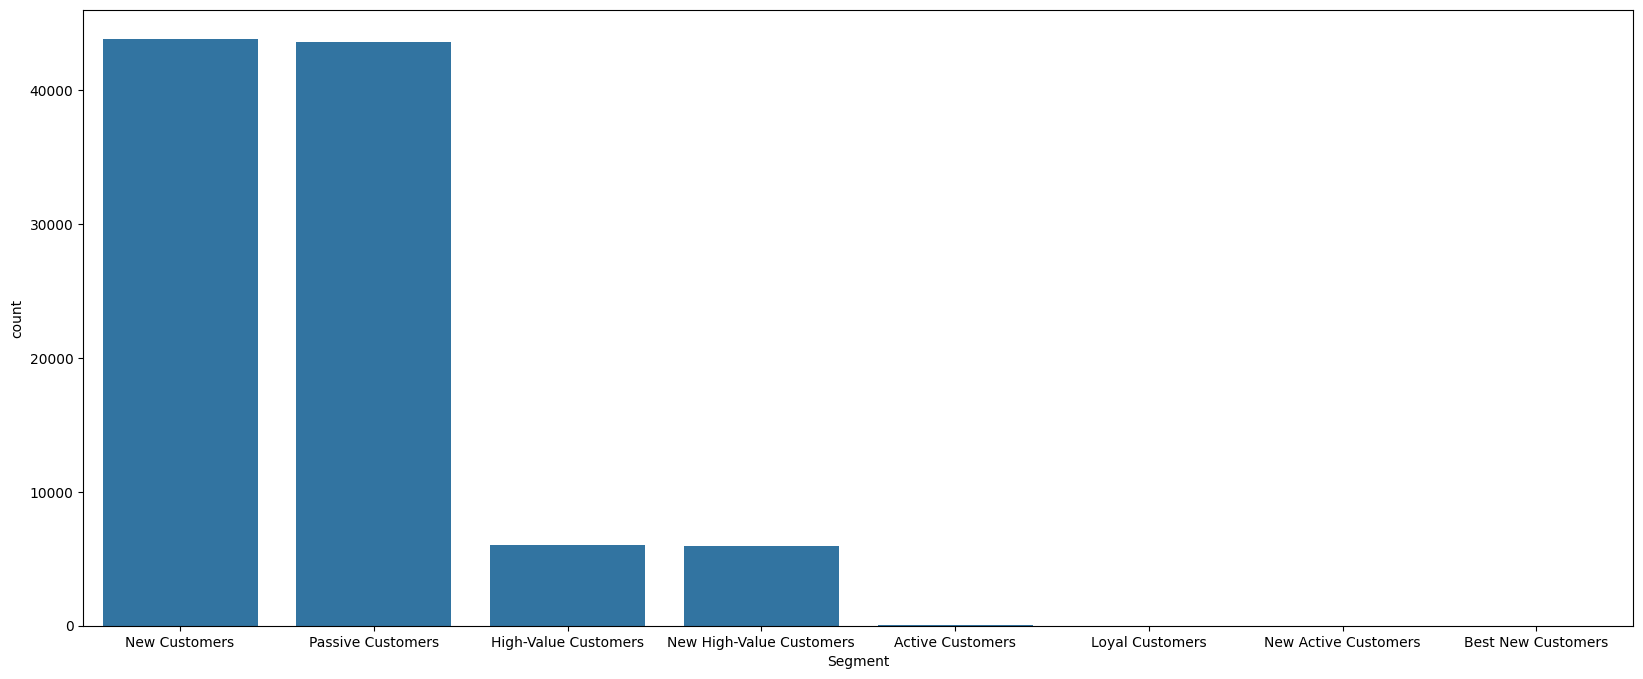

In [27]:
plt.figure(figsize=(20, 8))
sns.countplot(x='Segment', data=rfm_data, order=rfm_data['Segment'].value_counts().index)

Dari grafik di atas, dapat dilihat bahwa perilaku customer pada E-Commerce tersebut kebanyakan New Customer dan Passive Customer, dengan keterangan sebagai berikut : 
1. Segment New Customer, yang berarti customer di E-commerce tersebut kebanyakan pengguna baru yang baru melakukan sedikit transaksi dan tidak membeli produk yang mahal
2. Segment Passive Customer, yang berarti customer di E-commerce tersebut kebanyakan pengguna lama yang jarang melakukan transaksi dan tidak membeli produk yang mahal

Adapun beberapa saran : 
1. Untuk segment New Customer, Anda dapat menawarkan diskon khusus, program loyalitas, atau konten informatif yang dapat menarik perhatian mereka untuk bertransaksi lebih banyak. Gunakan strategi pemasaran yang lebih personal dan menyambut agar mereka merasa dihargai sebagai pelanggan baru.
2. Untuk segment Passive Customer, fokuskan pada kegiatan untuk mengaktifkan kembali keterlibatan mereka. Kirimkan penawaran khusus, berikan insentif untuk transaksi, atau kirimkan konten menarik yang mungkin memicu minat mereka kembali. Identifikasi alasan di balik ketidakaktifan mereka dan sesuaikan strategi kampanye berdasarkan temuan tersebut.

### Pertanyaan 2: 

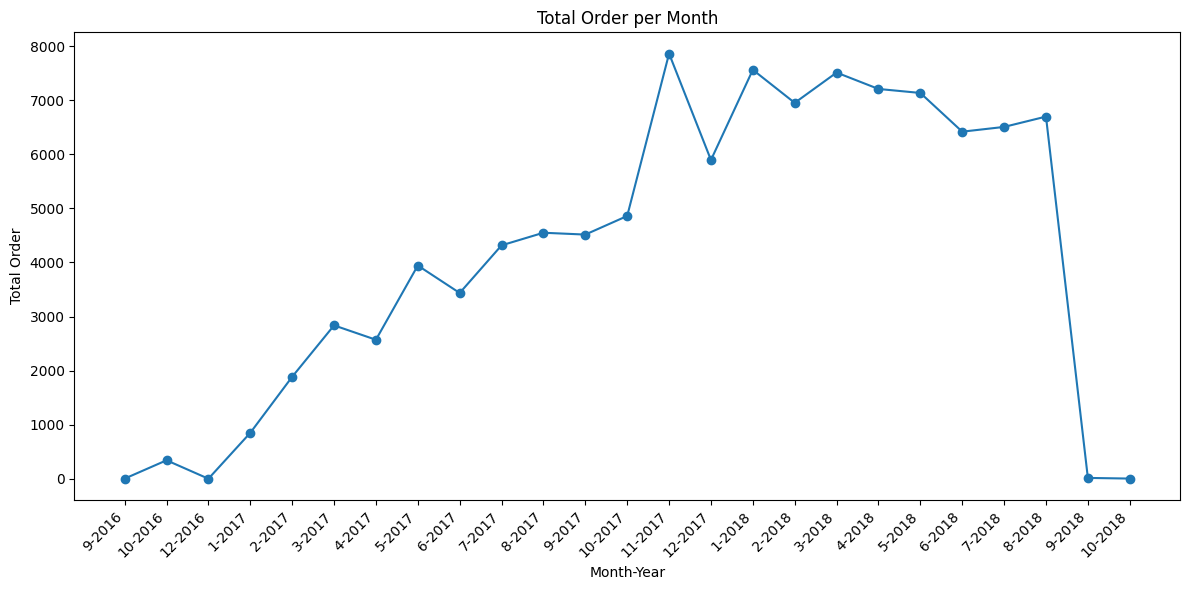

In [28]:
months = order_by_year.index.get_level_values(1)
years = order_by_year.index.get_level_values(0)
dates = [f'{month}-{year}' for month, year in zip(months, years)]

plt.figure(figsize=(12, 6))
plt.plot(dates, order_by_year['Total Order'], marker='o', linestyle='-')

plt.title('Total Order per Month')
plt.xlabel('Month-Year')
plt.ylabel('Total Order')

plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Dari grafik di atas, dapat dilihat trend penjualan dari tahun 2016 - 2017 jumlah pemesanan meningkat. Peningkatan ini dapat disebabkan oleh berbagai faktor, termasuk pertumbuhan ekonomi, peningkatan populasi, perkembangan teknologi, dan perubahan preferensi konsumen. Jumlah pemesanan tertinggi berada pada bulan November 2017, kemungkinan pada bulan tersebut banyak customer yang memerlukan barang saat akhir tahun.

Tetapi, pada September 2018, jumlah pemesanan menurun drastis. Hal tersebut kemungkinan customer lebih memilih e-commerce lain yang lebih nyaman digunakan, seperti lebih banyak diskon, kemudahan penggunaan.

## Conclusion

#### Kesimpulan Pertanyaan 1

Perilaku customer pada E-Commerce tersebut memang beragam, tetapi dari data dapat dilihat bahwa sebagian besar customer pada E-Commerce tersebut merupakan pengguna baru dan jarang melakukan pemesanan. Kebanyakan customer di E-Commerce tersebut mengeluarkan biaya untuk belanja < R$ 167

Adapun beberapa saran : 
1. Untuk segment New Customer, Anda dapat menawarkan diskon khusus, program loyalitas, atau konten informatif yang dapat menarik perhatian mereka untuk bertransaksi lebih banyak. Gunakan strategi pemasaran yang lebih personal dan menyambut agar mereka merasa dihargai sebagai pelanggan baru.

2. Untuk segment Passive Customer, fokuskan pada kegiatan untuk mengaktifkan kembali keterlibatan mereka. Kirimkan penawaran khusus, berikan insentif untuk transaksi, atau kirimkan konten menarik yang mungkin memicu minat mereka kembali. Identifikasi alasan di balik ketidakaktifan mereka dan sesuaikan strategi kampanye berdasarkan temuan tersebut.
        

### Kesimpulan Pertanyaan 2

Trend penjualan di E-Commerce tersebut meningkat drastis pada akhir tahun 2016 ke tahun 2017. Peningkatan ini dapat disebabkan oleh berbagai faktor, seperti :  
- pertumbuhan ekonomi, 
- peningkatan populasi, 
- perkembangan teknologi,
- perubahan preferensi konsumen. 
Jumlah pemesanan tertinggi berada pada bulan November 2017, kemungkinan pada bulan tersebut banyak customer yang memerlukan barang saat akhir tahun. 

Namun pada bulan September 2018, terjadi penurunan drastis jumlah pemesanan nya. Hal tersebut kemungkinan customer lebih memilih e-commerce lain yang lebih nyaman digunakan, seperti lebih banyak diskon, kemudahan penggunaan. Untuk mengetahui faktor penyebab yang pasti, bisnis tersebut perlu melakukan analisis lebih lanjut. Analisis tersebut dapat dilakukan dengan mengumpulkan data dari berbagai sumber, seperti data penjualan, data pelanggan, data pesaing, dan data kondisi ekonomi.

# Merge Data

In [29]:
all_data = pd.merge(df,rfm_data,on='customer_id')

# Export Data

In [30]:
all_data.to_csv("dashboard/semua_data.csv", index=False)

In [31]:
all_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,...,customer_city,customer_state,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,...,sao paulo,SP,381,3,38.71,2,1,1,211,Passive Customers
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,...,sao paulo,SP,381,3,38.71,2,1,1,211,Passive Customers
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,...,sao paulo,SP,381,3,38.71,2,1,1,211,Passive Customers
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,...,barreiras,BA,85,1,141.46,4,1,1,411,New Customers
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,...,vianopolis,GO,71,1,179.12,4,1,2,412,New Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-28,1,credit_card,3,85.08,6359f309b166b0196dbf7ad2ac62bb5a,...,sao jose dos campos,SP,588,1,85.08,1,1,1,111,Passive Customers
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-03-02,1,credit_card,3,195.00,da62f9e57a76d978d02ab5362c509660,...,praia grande,SP,254,1,195.00,3,1,2,312,New Customers
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-27,1,credit_card,5,271.01,737520a9aad80b3fbbdad19b66b37b30,...,nova vicosa,BA,417,1,271.01,1,1,2,112,Passive Customers
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-02-15,1,credit_card,4,441.16,5097a5312c8b157bb7be58ae360ef43c,...,japuiba,RJ,282,1,441.16,2,1,4,214,High-Value Customers
